# **Assignment #04**
# **Hope to Skills**

# **Free Artificial Intelligence Advance Course**

# **Install Library**

In [ ]:
!pip install pandas

In [ ]:
!pip install seaborn

# **Import Library**

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# **Load the DataSet**

In [ ]:
df = pd.read_csv('/content/titanic_dataset.csv')

# **Question 1:**
# **Create a pairplot to visualize relationships between multiple numerical variables.**

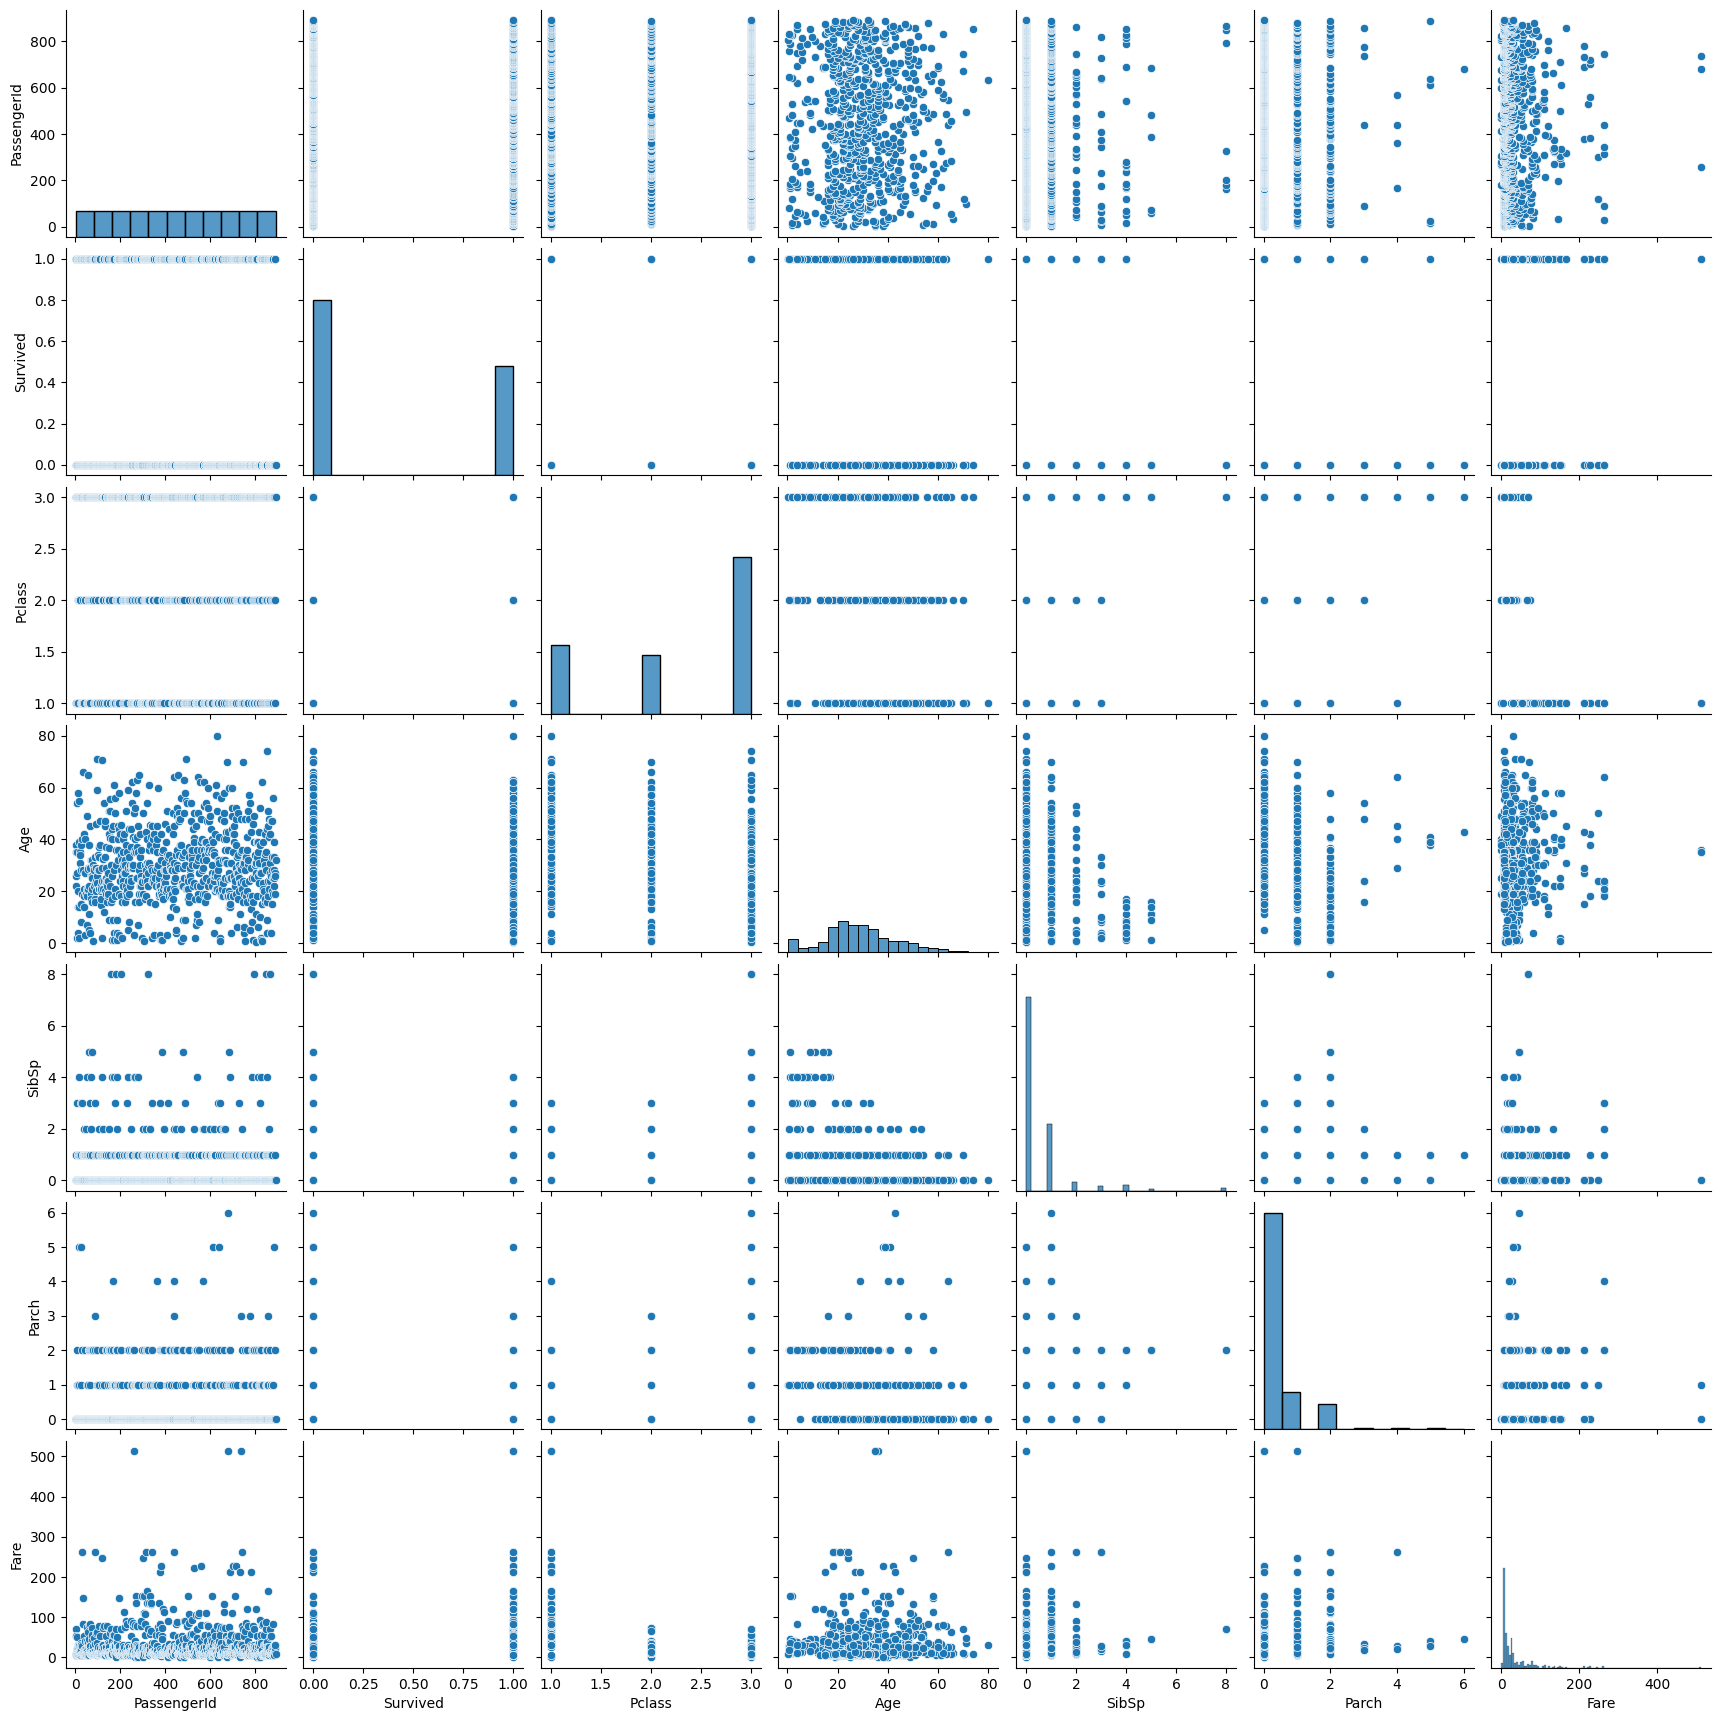

In [ ]:
sns.pairplot(df) ## Create the pairplot

# **Generate a heatmap to display the correlation matrix of these variables.**

In [ ]:
correlation =df.corr()

<ipython-input-5-b47f2c476a52>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation =df.corr()


<Axes: >

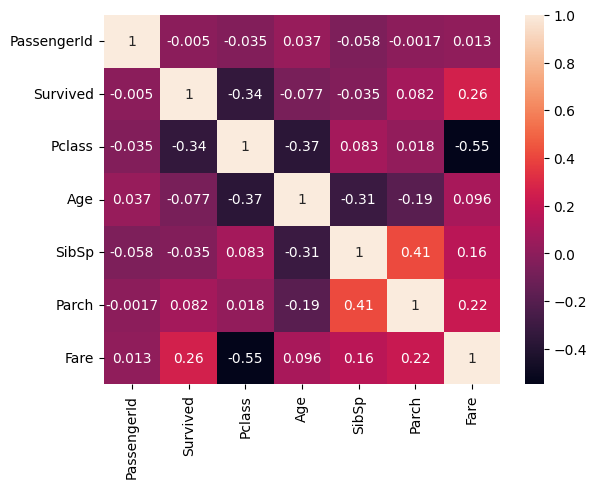

In [ ]:
sns.heatmap(correlation, annot=True)
#  Annotate with correlation values

# **Identify and print pairs of variables with the highest and lowest correlation coefficients**

In [ ]:
#Find Highest and lowest correlation coefficients
highest_corr= correlation.where(~np.tril(np.ones(correlation.shape)).astype(bool))
highest_corr =highest_corr.stack().sort_values(ascending=False).head(1)

lowest_corr = correlation.where(~np.triu(np.ones(correlation.shape)).astype(bool))
lowest_corr =lowest_corr.stack().sort_values(ascending=True).head(1)

#print ther result
print(f"Highest Correlation: {highest_corr.name} - {highest_corr.values[0]}")
print(f"Lowest Correlation: {lowest_corr.name} - {lowest_corr.values[0]}")

#display the plot
plt.show()

Highest Correlation: None - 0.41483769862015624
Lowest Correlation: None - -0.5494996199439076


# **Question 2: Explore the Netflix dataset to understand the distribution of movies vs. TV shows, identify the**
# **countries producing the most content, and analyze the trend of releases over the years. What genres**
# **are most common, and how does the rating distribution vary across genres?**

# **Load the Dataset**

In [ ]:
data = pd.read_csv('/content/netflix_titles.csv')

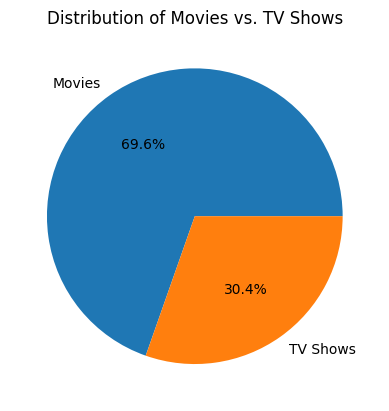

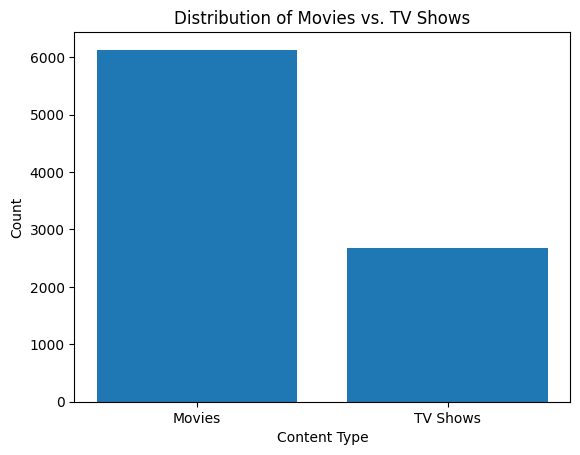

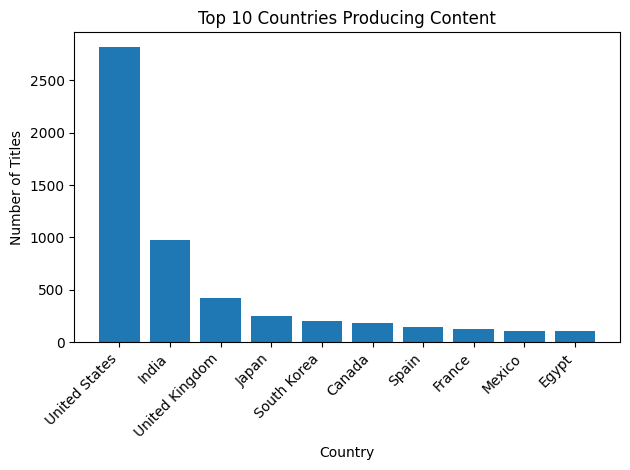

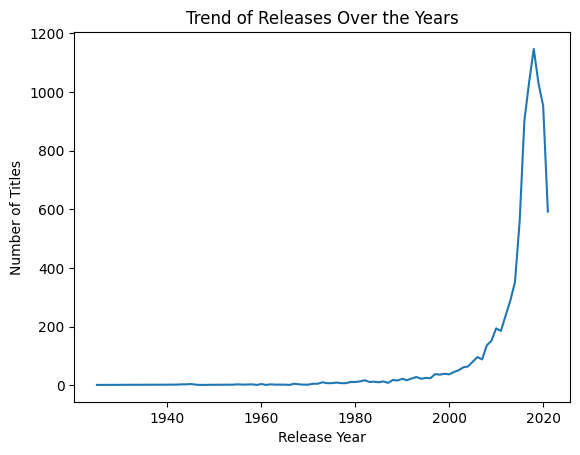

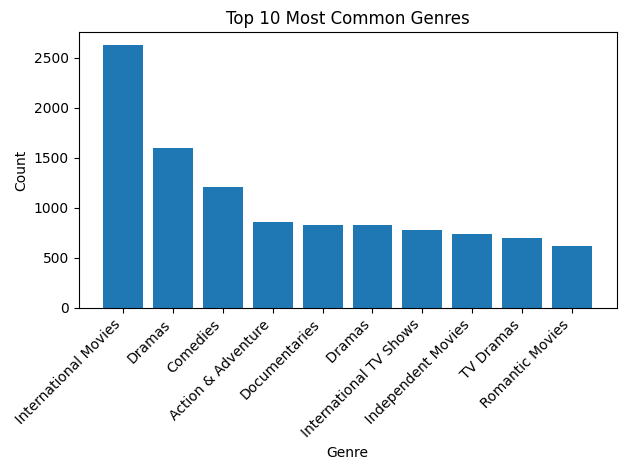

Explore genre_ratings DataFrame for detailed rating information by genre.


In [ ]:

# Distribution of Movies vs. TV Shows
movie_count = data[data['type'] == 'Movie'].shape[0]
# Selects rows where the 'type' is "Movie".
#.shape[0]: Counts the number of rows in the resulting DataFrame,

tv_show_count = data[data['type'] == 'TV Show'].shape[0]

# Display 1: Pie Chart
#Pie chart: Uses plt.pie to create a pie chart displaying the proportion of movies and TV shows.
plt.pie([movie_count, tv_show_count], labels=['Movies', 'TV Shows'], autopct='%1.1f%%')
plt.title('Distribution of Movies vs. TV Shows')
plt.show()

#Display 2: Bar Chart
#Bar chart: Uses plt.bar to create a bar chart comparing the counts of movies and TV shows
plt.bar(['Movies', 'TV Shows'], [movie_count, tv_show_count])
plt.xlabel('Content Type')
plt.ylabel('Count')
plt.title('Distribution of Movies vs. TV Shows')
plt.show()

# Top Content Producing Countries
top_countries = data['country'].value_counts().head(10)  # Consider adjusting the number of top countries

#Display 1: Bar Chart
plt.bar(top_countries.index, top_countries.values)
plt.xlabel('Country')
plt.ylabel('Number of Titles')
plt.title('Top 10 Countries Producing Content')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent overlapping elements
plt.show()

# Trend of Releases Over the Years
release_years = data['release_year'].value_counts().sort_index()

plt.plot(release_years.index, release_years.values)
plt.xlabel('Release Year')
plt.ylabel('Number of Titles')
plt.title('Trend of Releases Over the Years')
plt.show()

# Most Common Genres
# Assuming 'listed_in' contains genres separated by commas
genres = data['listed_in'].str.split(',').explode().value_counts().head(10)

plt.bar(genres.index, genres.values)
plt.xlabel('Genre')
plt.ylabel('Count')
plt.title('Top 10 Most Common Genres')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent overlapping elements
plt.show()

# Rating Distribution by Genre
# Group data by genre and calculate descriptive statistics (including mean and standard deviation) for ratings
genre_ratings = data.groupby('listed_in')['rating'].describe()

# Explore further using boxplots or violinplots to visualize rating distribution across genres
# (consider using libraries like seaborn for advanced visualizations)

print("Explore genre_ratings DataFrame for detailed rating information by genre.")

# **Question 3: Conduct an exploratory data analysis on the Melbourne Housing Market dataset. Identify trends in**
# **housing prices over time, analyze the impact of location, and explore the relationship between**
# **property attributes (such as the number of rooms, type of property, and land size) and price.**

In [ ]:
import pandas as pd
import matplotlib.pyplot as pt

In [ ]:
ds =pd.read_csv('/content/MELBOURNE_HOUSE_PRICES_LESS.csv')

# **Explore Basic Statistics:**

In [ ]:
ds.describe()
ds['Suburb'].value_counts()
ds['Type'].value_counts()


h    25842
u     6807
t     3637
Name: Type, dtype: int64

In [ ]:
ds.head()

Suburb           Address  Rooms Type      Price Method   SellerG  \
0    Abbotsford     49 Lithgow St      3    h  1490000.0      S    Jellis   
1    Abbotsford     59A Turner St      3    h  1220000.0      S  Marshall   
2    Abbotsford     119B Yarra St      3    h  1420000.0      S    Nelson   
3    Aberfeldie        68 Vida St      3    h  1515000.0      S     Barry   
4  Airport West  92 Clydesdale Rd      2    h   670000.0      S    Nelson   

        Date  Postcode             Regionname  Propertycount  Distance  \
0  1/04/2017      3067  Northern Metropolitan           4019       3.0   
1  1/04/2017      3067  Northern Metropolitan           4019       3.0   
2  1/04/2017      3067  Northern Metropolitan           4019       3.0   
3  1/04/2017      3040   Western Metropolitan           1543       7.5   
4  1/04/2017      3042   Western Metropolitan           3464      10.4   

                  CouncilArea  
0          Yarra City Council  
1          Yarra City Council  
2          Yarra City Council  
3  Moonee Valley City Council  
4  Moonee Valley City Council

# **. Trends in Housing Prices Over Time:**

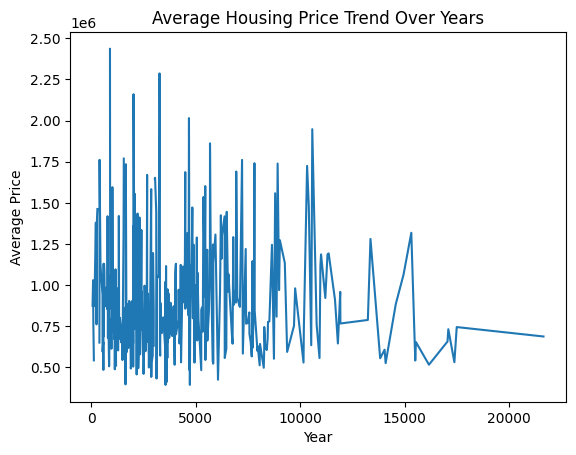

In [ ]:
yearly_prices = ds.groupby('Propertycount')['Price'].mean()
plt.plot(yearly_prices.index, yearly_prices.values)
plt.xlabel('Year')
plt.ylabel('Average Price')
plt.title('Average Housing Price Trend Over Years')
plt.show()


# **Impact of Location**

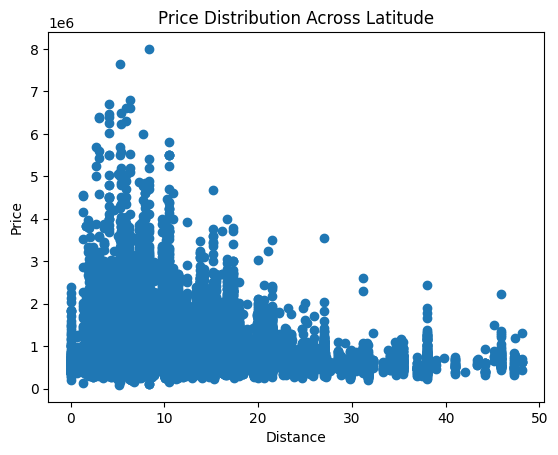

In [ ]:
plt.scatter(ds['Distance'], ds['Price'])  # Scatter plot (Latitude vs. Price)
plt.xlabel('Distance')
plt.ylabel('Price')
plt.title('Price Distribution Across Latitude')
plt.show()


In [ ]:
correlations = ds[['Price', 'Rooms', 'CouncilArea']].corr()
print(correlations)


          Price     Rooms
Price  1.000000  0.419173
Rooms  0.419173  1.000000


<ipython-input-9-eb7578daa3eb>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations = ds[['Price', 'Rooms', 'CouncilArea']].corr()


In [ ]:
# Group the data by Type
grouped_data = ds.groupby('Type')

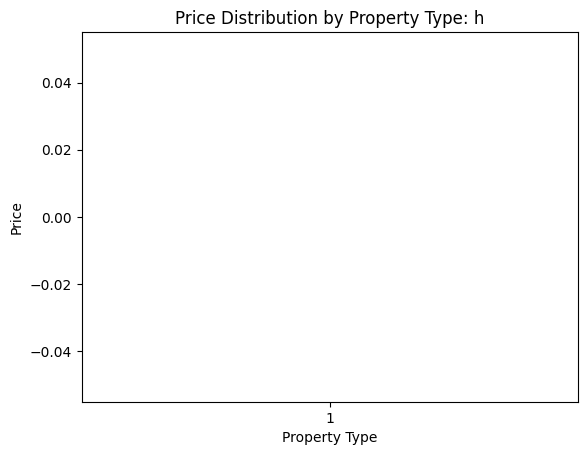

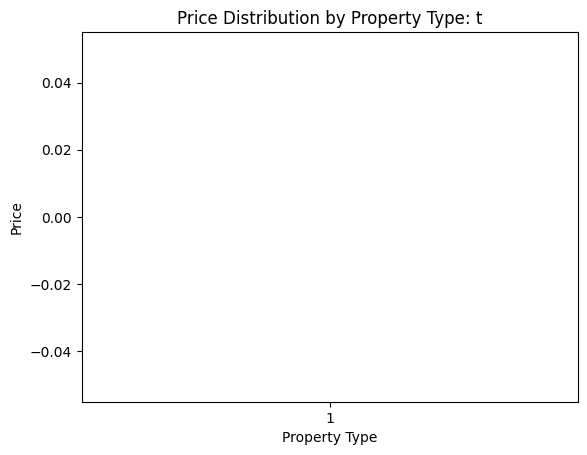

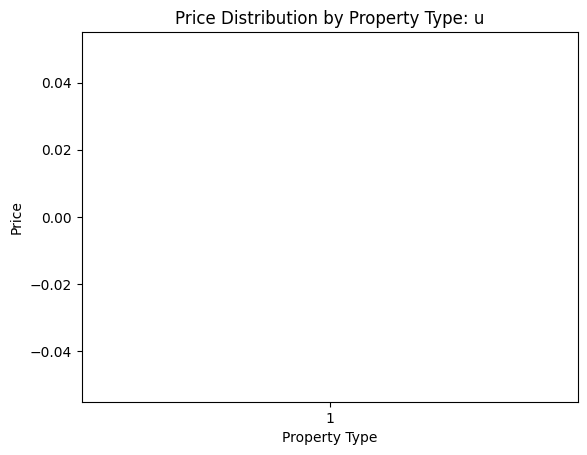

In [ ]:


# Group the data by Type
grouped_data = ds.groupby('Type')

# Create a boxplot for each group
for name, group in grouped_data:
    plt.boxplot(group['Price'], notch=True)
    plt.xlabel('Property Type')
    plt.ylabel('Price')
    plt.title(f'Price Distribution by Property Type: {name}')
    plt.show()

# **Question 4:**

# **Load Data_Test**

In [2]:
gt =sns.load_dataset("taxis")

# **Display Head**

In [ ]:
gt.head()


pickup             dropoff  passengers  distance  fare   tip  \
0 2019-03-23 20:21:09 2019-03-23 20:27:24           1      1.60   7.0  2.15   
1 2019-03-04 16:11:55 2019-03-04 16:19:00           1      0.79   5.0  0.00   
2 2019-03-27 17:53:01 2019-03-27 18:00:25           1      1.37   7.5  2.36   
3 2019-03-10 01:23:59 2019-03-10 01:49:51           1      7.70  27.0  6.15   
4 2019-03-30 13:27:42 2019-03-30 13:37:14           3      2.16   9.0  1.10   

   tolls  total   color      payment            pickup_zone  \
0    0.0  12.95  yellow  credit card        Lenox Hill West   
1    0.0   9.30  yellow         cash  Upper West Side South   
2    0.0  14.16  yellow  credit card          Alphabet City   
3    0.0  36.95  yellow  credit card              Hudson Sq   
4    0.0  13.40  yellow  credit card           Midtown East   

            dropoff_zone pickup_borough dropoff_borough  
0    UN/Turtle Bay South      Manhattan       Manhattan  
1  Upper West Side South      Manhattan       Manhattan  
2           West Village      Manhattan       Manhattan  
3         Yorkville West      Manhattan       Manhattan  
4         Yorkville West      Manhattan       Manhattan

# **Display Shape**

In [ ]:
gt.shape

(6433, 14)

# **Display Basic Statictis**

In [ ]:
gt.describe()

passengers     distance         fare         tip        tolls  \
count  6433.000000  6433.000000  6433.000000  6433.00000  6433.000000   
mean      1.539251     3.024617    13.091073     1.97922     0.325273   
std       1.203768     3.827867    11.551804     2.44856     1.415267   
min       0.000000     0.000000     1.000000     0.00000     0.000000   
25%       1.000000     0.980000     6.500000     0.00000     0.000000   
50%       1.000000     1.640000     9.500000     1.70000     0.000000   
75%       2.000000     3.210000    15.000000     2.80000     0.000000   
max       6.000000    36.700000   150.000000    33.20000    24.020000   

             total  
count  6433.000000  
mean     18.517794  
std      13.815570  
min       1.300000  
25%      10.800000  
50%      14.160000  
75%      20.300000  
max     174.820000

# **Display missing Value**

In [ ]:
gt.isnull()

pickup  dropoff  passengers  distance   fare    tip  tolls  total  \
0      False    False       False     False  False  False  False  False   
1      False    False       False     False  False  False  False  False   
2      False    False       False     False  False  False  False  False   
3      False    False       False     False  False  False  False  False   
4      False    False       False     False  False  False  False  False   
...      ...      ...         ...       ...    ...    ...    ...    ...   
6428   False    False       False     False  False  False  False  False   
6429   False    False       False     False  False  False  False  False   
6430   False    False       False     False  False  False  False  False   
6431   False    False       False     False  False  False  False  False   
6432   False    False       False     False  False  False  False  False   

      color  payment  pickup_zone  dropoff_zone  pickup_borough  \
0     False    False        False         False           False   
1     False    False        False         False           False   
2     False    False        False         False           False   
3     False    False        False         False           False   
4     False    False        False         False           False   
...     ...      ...          ...           ...             ...   
6428  False    False        False         False           False   
6429  False    False        False         False           False   
6430  False    False        False         False           False   
6431  False    False        False         False           False   
6432  False    False        False         False           False   

      dropoff_borough  
0               False  
1               False  
2               False  
3               False  
4               False  
...               ...  
6428            False  
6429            False  
6430            False  
6431            False  
6432            False  

[6433 rows x 14 columns]

In [ ]:
gt.isnull().sum()

pickup              0
dropoff             0
passengers          0
distance            0
fare                0
tip                 0
tolls               0
total               0
color               0
payment            44
pickup_zone        26
dropoff_zone       45
pickup_borough     26
dropoff_borough    45
dtype: int64

# **Check the missinh Value in graphy**

<Axes: >

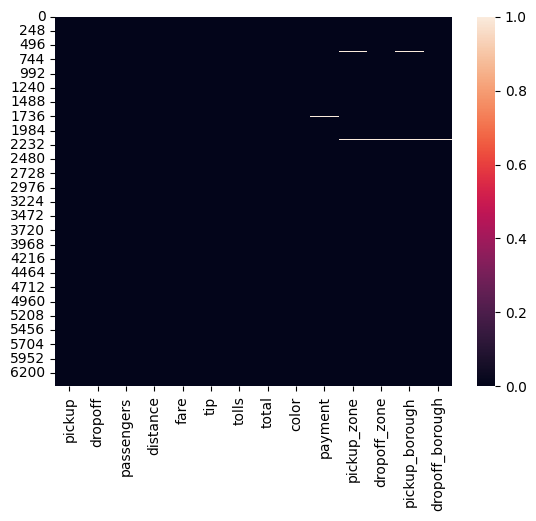

In [ ]:
sns.heatmap(gt.isnull())

# **Reomve Missing value**

In [ ]:
remove  =gt.dropna()

# **Again Check Missing Value**

In [ ]:
remove.isnull().sum()

pickup             0
dropoff            0
passengers         0
distance           0
fare               0
tip                0
tolls              0
total              0
color              0
payment            0
pickup_zone        0
dropoff_zone       0
pickup_borough     0
dropoff_borough    0
dtype: int64

# **Check for and handle any outliers in the data**

# **Box plot**

<Axes: >

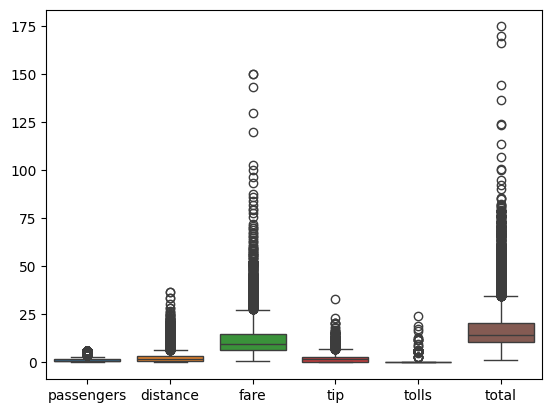

In [ ]:
sns.boxplot(gt)

<ipython-input-3-96d63ca197ce>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(gt[['passengers', 'distance', 'fare', 'tip', 'tolls', 'total']])


<Axes: ylabel='Density'>

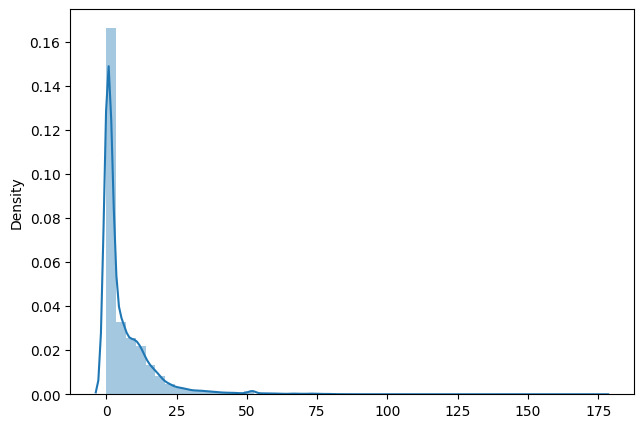

In [ ]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(gt[['passengers', 'distance', 'fare', 'tip', 'tolls', 'total']])



# **Find Quantile in  taxis dataset**

In [ ]:
# Finding the IQR
Q1 = gt[['passengers', 'distance', 'fare', 'tip', 'tolls', 'total']].quantile(0.25)
Q3 = gt[['passengers', 'distance', 'fare', 'tip', 'tolls', 'total']].quantile(0.75)

print(" quartile 1 ", Q1)
print("quartile 3 " , Q3)

 quartile 1  passengers     1.00
distance       0.98
fare           6.50
tip            0.00
tolls          0.00
total         10.80
Name: 0.25, dtype: float64
quartile 3  passengers     2.00
distance       3.21
fare          15.00
tip            2.80
tolls          0.00
total         20.30
Name: 0.75, dtype: float64


In [ ]:
 IQR =Q3 -Q1

In [ ]:
upper_bound = Q3+ 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR

print("upper bound ", upper_bound)
print("lower bound", lower_bound)

upper bound  passengers     3.500
distance       6.555
fare          27.750
tip            7.000
tolls          0.000
total         34.550
dtype: float64
lower bound passengers   -0.500
distance     -2.365
fare         -6.250
tip          -4.200
tolls         0.000
total        -3.450
dtype: float64


# **Find outlier in taxis dataset**

In [ ]:
gt[['passengers', 'distance', 'fare', 'tip', 'tolls', 'total']] > upper_bound

passengers  distance   fare    tip  tolls  total
0          False     False  False  False  False  False
1          False     False  False  False  False  False
2          False     False  False  False  False  False
3          False      True  False  False  False   True
4          False     False  False  False  False  False
...          ...       ...    ...    ...    ...    ...
6428       False     False  False  False  False  False
6429       False      True   True  False  False   True
6430       False     False  False  False  False  False
6431       False     False  False  False  False  False
6432       False     False  False  False  False  False

[6433 rows x 6 columns]

In [ ]:
gt[['passengers', 'distance', 'fare', 'tip', 'tolls', 'total']] < lower_bound

passengers  distance   fare    tip  tolls  total
0          False     False  False  False  False  False
1          False     False  False  False  False  False
2          False     False  False  False  False  False
3          False     False  False  False  False  False
4          False     False  False  False  False  False
...          ...       ...    ...    ...    ...    ...
6428       False     False  False  False  False  False
6429       False     False  False  False  False  False
6430       False     False  False  False  False  False
6431       False     False  False  False  False  False
6432       False     False  False  False  False  False

[6433 rows x 6 columns]

# **Triming method use in taxis dataset**

The trimmed mean is a statistical measure that calculates a dataset's average after removing a certain percentage of extreme values from both ends of the distribution. By excluding outliers, this statistic can provide a more accurate representation of a dataset's typical or central values.

In [ ]:
data_new = gt[['passengers', 'distance', 'fare', 'tip', 'tolls', 'total']]<  upper_bound

In [ ]:
data_new.shape

(6433, 6)

<ipython-input-19-d3c8ba57b7e1>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(gt[['passengers', 'distance', 'fare', 'tip', 'tolls', 'total']])
<ipython-input-19-d3c8ba57b7e1>:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_new[[ 'passengers', 'distance', 'fare', 'tip', 'tolls', 'total'

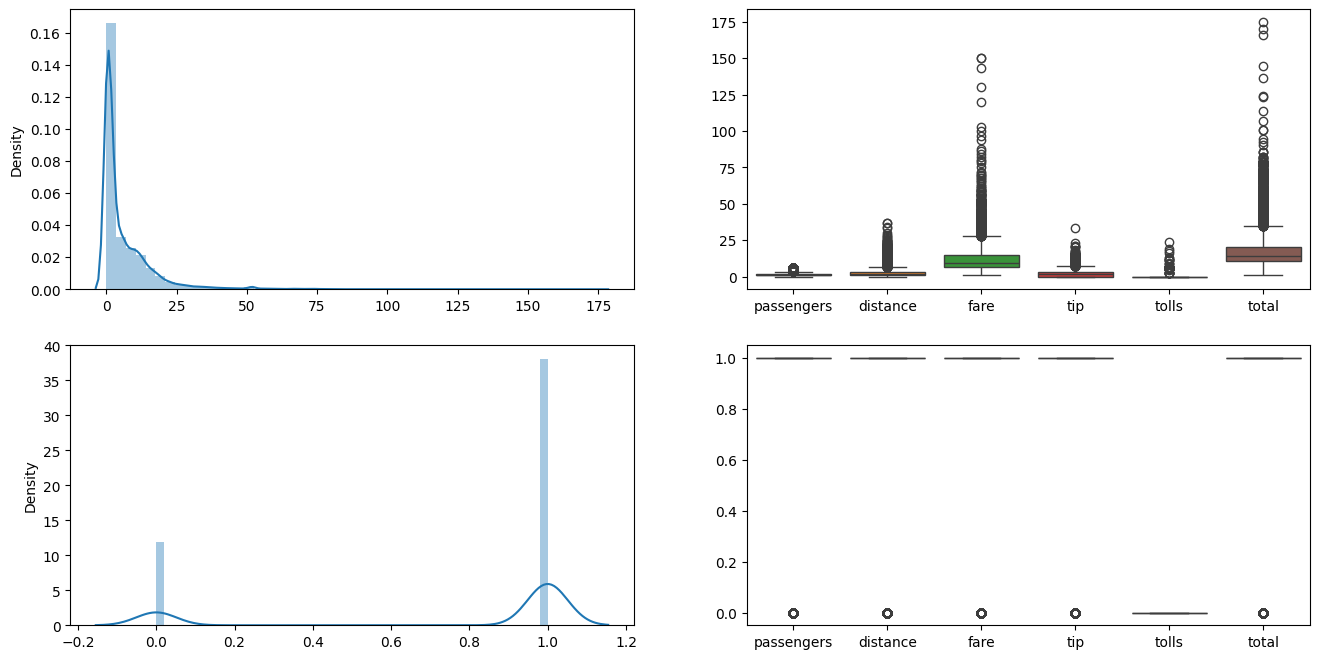

In [ ]:
# Comparing

plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(gt[['passengers', 'distance', 'fare', 'tip', 'tolls', 'total']])

plt.subplot(2,2,2)
sns.boxplot(gt[[ 'passengers', 'distance', 'fare', 'tip', 'tolls', 'total']])

plt.subplot(2,2,3)
sns.distplot(data_new[[ 'passengers', 'distance', 'fare', 'tip', 'tolls', 'total']] )

plt.subplot(2,2,4)
sns.boxplot(data_new[['passengers', 'distance', 'fare', 'tip', 'tolls', 'total' ]])

plt.show()

# **capping method use in taxis dataset**

Capping. In this technique called “outlier detection,” we cap our data to set limits. For instance, if we decide on a specific value, any data point above or below that value is considered an outlier. The number of outliers in the dataset then gives us insight into that capping number.

In [ ]:
full_data = gt.copy()

full_data[['passengers', 'distance', 'fare', 'tip', 'tolls', 'total']] = np.where(
     full_data[['passengers', 'distance', 'fare', 'tip', 'tolls', 'total']] > upper_bound,
    upper_bound,
    np.where(
        full_data [['passengers', 'distance', 'fare', 'tip', 'tolls', 'total']]< lower_bound,
        lower_bound,
        full_data [[ 'passengers', 'distance', 'fare', 'tip', 'tolls', 'total']]
    )
)

In [ ]:
full_data.shape

(6433, 14)

<ipython-input-22-2f6c0fd11602>:8: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,2,2)
<ipython-input-22-2f6c0fd11602>:14: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,2,4)


<Axes: >

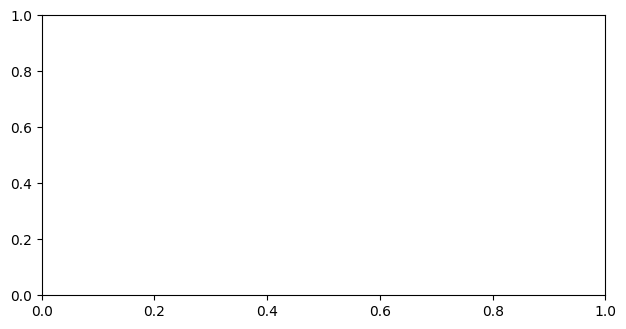

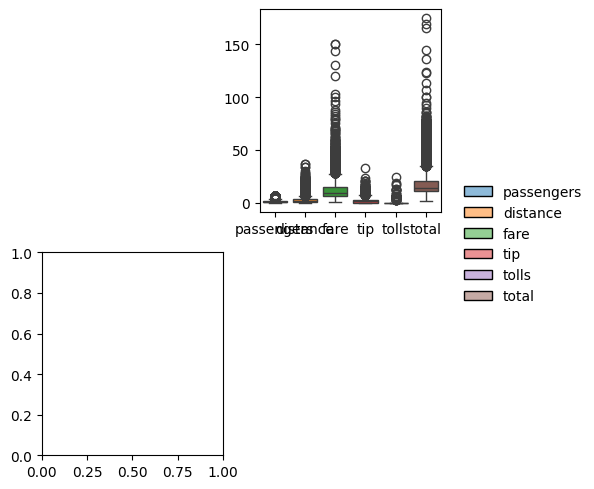

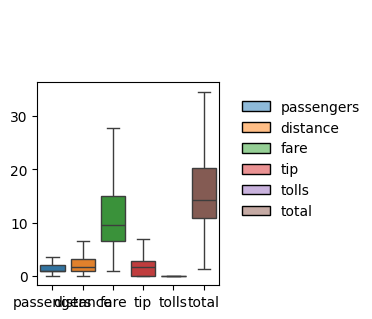

In [ ]:
#comparing

plt.figure(figsize=(16,8))
plt.subplot(2,2,1)

sns.displot(gt[['passengers', 'distance', 'fare', 'tip', 'tolls', 'total']])

plt.subplot(2,2,2)
sns.boxplot(gt[['passengers', 'distance', 'fare', 'tip', 'tolls', 'total']])

plt.subplot(2,2,3)
sns.displot(full_data[['passengers', 'distance', 'fare', 'tip', 'tolls', 'total']])

plt.subplot(2,2,4)
sns.boxplot(full_data[['passengers', 'distance', 'fare', 'tip', 'tolls', 'total']])

# **Visualize the data**

# **Distplot**

The distplot() function provides the most convenient way to take a quick look at univariate distribution. This function will plot a histogram that fits the kernel density estimation(KDE) of the data.

Now let's plot the histogram of Number of parents and children of the passenger aboard(parch).

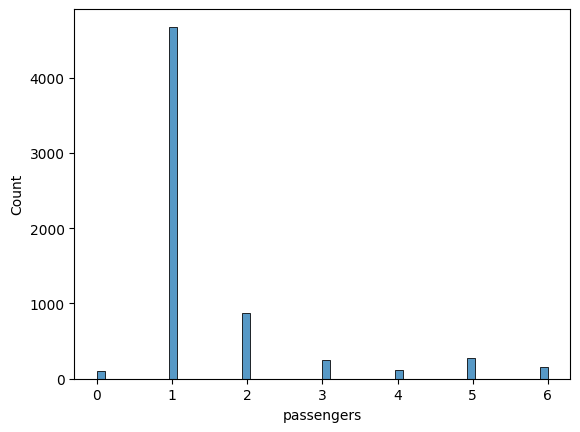

In [ ]:
sns.histplot(gt['passengers'],kde=False)
plt.show()

<ipython-input-28-38a974d580f6>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(full_data['passengers'], hist=False)


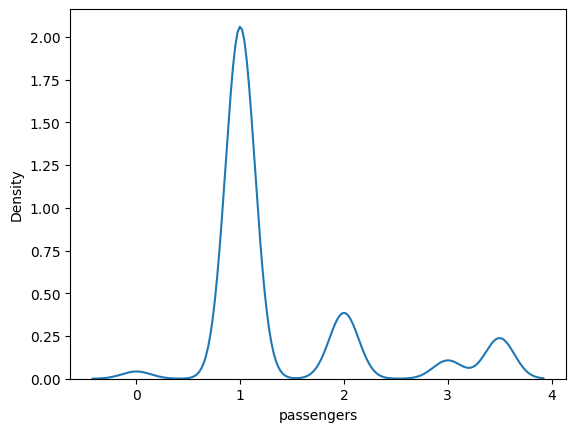

In [ ]:
sns.distplot(full_data['passengers'], hist=False)
plt.show()

# **Relational plots**

The function relplot() is named that way because it is designed to visualize many different statistical relationships. While scatter plots are a highly effective way of doing this, relationships where one variable represents a measure of time are better represented by a line. The relplot() function has a convenient kind parameter to let you easily switch to this alternate representation.

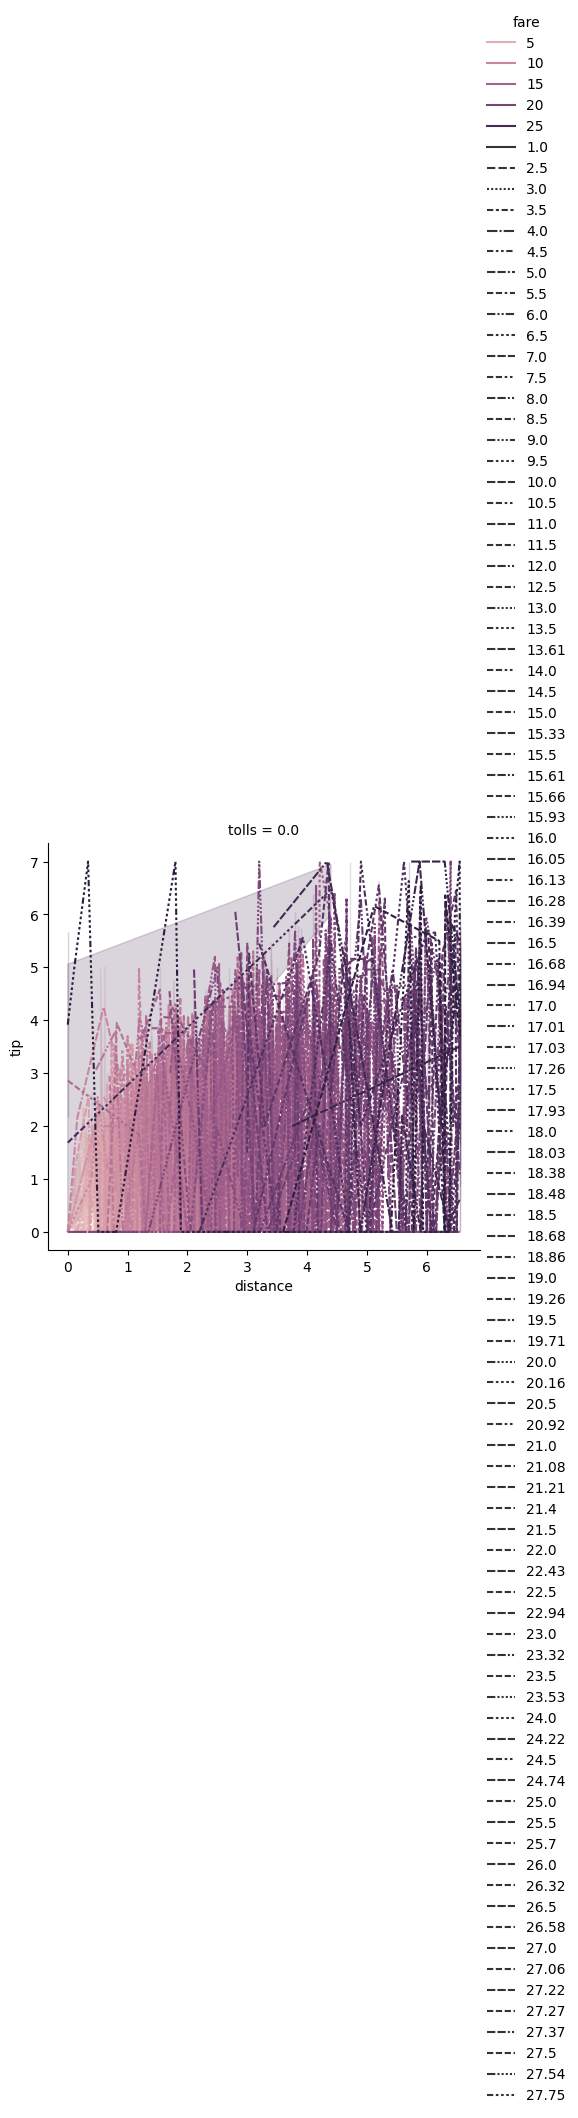

In [ ]:
sns.relplot(x="distance", y="tip", col="tolls", hue="fare", style="fare",kind="line", data=full_data) # scatter can be used instead of "line" plot
plt.show()

# **scatterplot**

Scatter plot is the most convenient way to visualize the distribution where each observation is represented in two -dimensional plot via x and y axis.

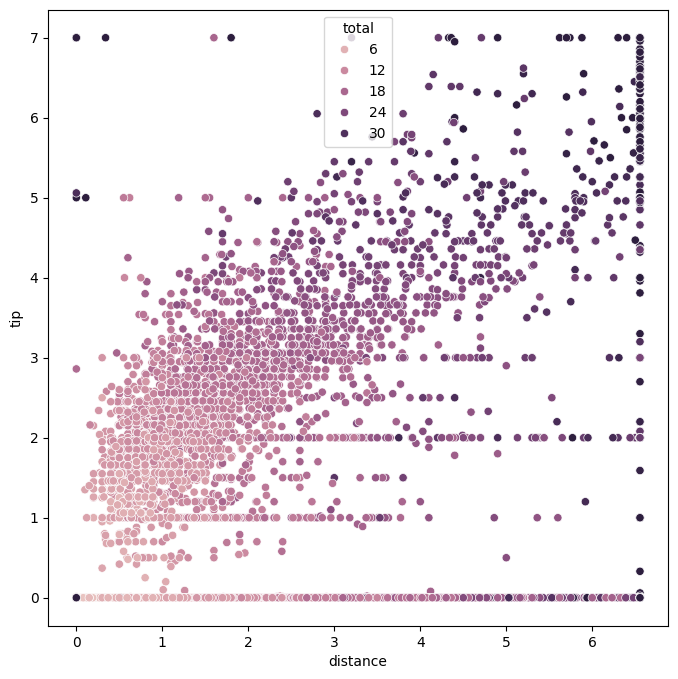

In [ ]:
plt.figure(figsize=(8,8))
sns.scatterplot(x="distance", y="tip", hue="total", data=full_data)
plt.show()

# **lineplot**

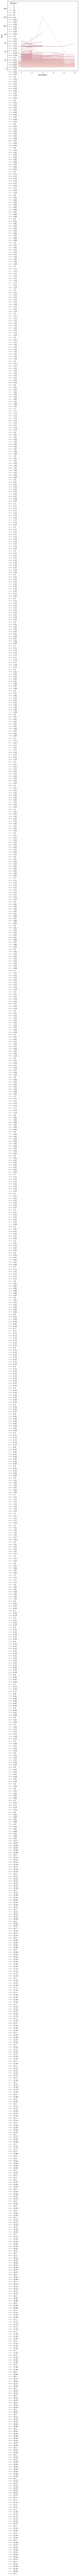

In [ ]:
plt.figure(figsize=(8,8))
sns.lineplot(x="passengers", y="fare", hue="distance", style="distance", data=gt)
plt.show()

# **stripplot**

tripplot() is used when one of the variable under study is categorical. It represents the data in sorted order along any one of the axis.

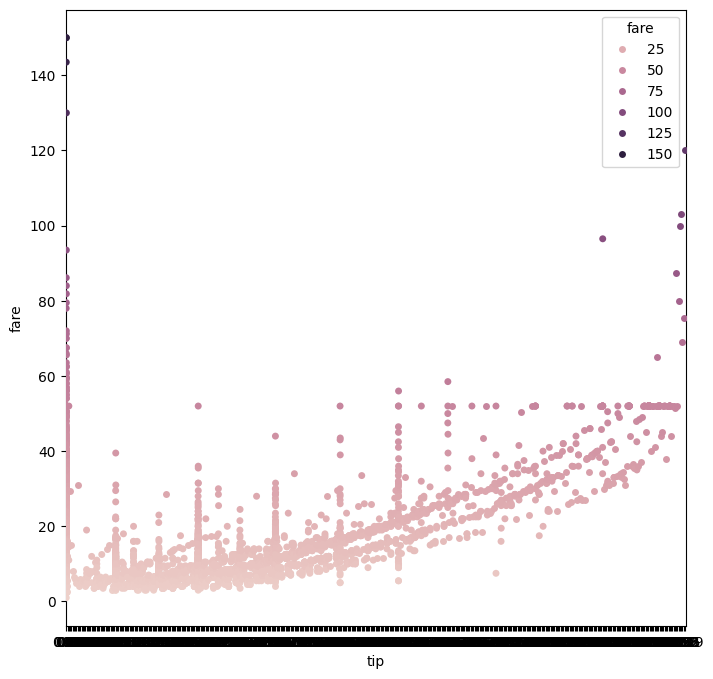

In [ ]:
plt.figure(figsize=(8,8))
sns.stripplot(x="tip", y="fare",hue='fare', data=gt)
plt.show()

# **swarmplot**

This function positions each point of scatter plot on the categorical axis and thereby avoids overlapping points:

In [ ]:
plt.figure(figsize=(8,8))
sns.swarmplot(x="total", y="tip",hue='tip', data=full_data)
plt.show()

# **countplot**

A special case in barplot is to show the no of observations in each category rather than computing a statistic for a second variable. For this, we use countplot().

In [ ]:
sns.countplot(x="passengers", data=full_data, palette="Blues");
plt.show()

In [51]:
gt.head(3)

pickup             dropoff  passengers  distance  fare   tip  \
0 2019-03-23 20:21:09 2019-03-23 20:27:24           1      1.60   7.0  2.15   
1 2019-03-04 16:11:55 2019-03-04 16:19:00           1      0.79   5.0  0.00   
2 2019-03-27 17:53:01 2019-03-27 18:00:25           1      1.37   7.5  2.36   

   tolls  total   color      payment            pickup_zone  \
0    0.0  12.95  yellow  credit card        Lenox Hill West   
1    0.0   9.30  yellow         cash  Upper West Side South   
2    0.0  14.16  yellow  credit card          Alphabet City   

            dropoff_zone pickup_borough dropoff_borough  
0    UN/Turtle Bay South      Manhattan       Manhattan  
1  Upper West Side South      Manhattan       Manhattan  
2           West Village      Manhattan       Manhattan

In [60]:
X_train, X_test, y_train, y_test = train_test_split(gt.drop(columns=['pickup_borough', 'dropoff_borough']),
                                            \        gt[['pickup_borough', 'dropoff_borough']],
                                                    test_size=0.2)

In [ ]:
 # Ordinalencoding -> cough
oe = OrdinalEncoder(categories=[['credit card', 'cash']])
X_train_payment = oe.fit_transform(X_train[['payment']])

# also the test data
X_test_cough = oe.fit_transform(X_test[['cough']])

X_train_cough.shape

In [89]:
ws= X_train.isnull().sum()

In [105]:
X_train[['payment','dropoff_zone']].dtypes

payment         object
dropoff_zone    object
dtype: object

# **One hot Encoder**

In [119]:
pd.get_dummies(gt,columns=['payment','pickup_zone','dropoff_zone','color', 'pickup_borough', 'dropoff_borough'])

pickup             dropoff  passengers  distance  fare  \
0    2019-03-23 20:21:09 2019-03-23 20:27:24           1      1.60   7.0   
1    2019-03-04 16:11:55 2019-03-04 16:19:00           1      0.79   5.0   
2    2019-03-27 17:53:01 2019-03-27 18:00:25           1      1.37   7.5   
3    2019-03-10 01:23:59 2019-03-10 01:49:51           1      7.70  27.0   
4    2019-03-30 13:27:42 2019-03-30 13:37:14           3      2.16   9.0   
...                  ...                 ...         ...       ...   ...   
6428 2019-03-31 09:51:53 2019-03-31 09:55:27           1      0.75   4.5   
6429 2019-03-31 17:38:00 2019-03-31 18:34:23           1     18.74  58.0   
6430 2019-03-23 22:55:18 2019-03-23 23:14:25           1      4.14  16.0   
6431 2019-03-04 10:09:25 2019-03-04 10:14:29           1      1.12   6.0   
6432 2019-03-13 19:31:22 2019-03-13 19:48:02           1      3.85  15.0   

       tip  tolls  total  payment_cash  payment_credit card  ...  \
0     2.15    0.0  12.95             0                    1  ...   
1     0.00    0.0   9.30             1                    0  ...   
2     2.36    0.0  14.16             0                    1  ...   
3     6.15    0.0  36.95             0                    1  ...   
4     1.10    0.0  13.40             0                    1  ...   
...    ...    ...    ...           ...                  ...  ...   
6428  1.06    0.0   6.36             0                    1  ...   
6429  0.00    0.0  58.80             0                    1  ...   
6430  0.00    0.0  17.30             1                    0  ...   
6431  0.00    0.0   6.80             0                    1  ...   
6432  3.36    0.0  20.16             0                    1  ...   

      color_yellow  pickup_borough_Bronx  pickup_borough_Brooklyn  \
0                1                     0                        0   
1                1                     0                        0   
2                1                     0                        0   
3                1                     0                        0   
4                1                     0                        0   
...            ...                   ...                      ...   
6428             0                     0                        0   
6429             0                     0                        0   
6430             0                     0                        1   
6431             0                     0                        1   
6432             0                     0                        1   

      pickup_borough_Manhattan  pickup_borough_Queens  dropoff_borough_Bronx  \
0                            1                      0                      0   
1                            1                      0                      0   
2                            1                      0                      0   
3                            1                      0                      0   
4                            1                      0                      0   
...                        ...                    ...                    ...   
6428                         1                      0                      0   
6429                         0                      1                      1   
6430                         0                      0                      0   
6431                         0                      0                      0   
6432                         0                      0                      0   

      dropoff_borough_Brooklyn  dropoff_borough_Manhattan  \
0                            0                          1   
1                            0                          1   
2                            0                          1   
3                            0                          1   
4                            0                          1   
...                        ...                        ...   
6428                         0                          1   
6429      

# **K-1 OneHotEncoding**

In [124]:
pd.get_dummies(gt,columns=['payment','pickup_zone','dropoff_zone','color', 'pickup_borough', 'dropoff_borough'],drop_first=True)

pickup             dropoff  passengers  distance  fare  \
0    2019-03-23 20:21:09 2019-03-23 20:27:24           1      1.60   7.0   
1    2019-03-04 16:11:55 2019-03-04 16:19:00           1      0.79   5.0   
2    2019-03-27 17:53:01 2019-03-27 18:00:25           1      1.37   7.5   
3    2019-03-10 01:23:59 2019-03-10 01:49:51           1      7.70  27.0   
4    2019-03-30 13:27:42 2019-03-30 13:37:14           3      2.16   9.0   
...                  ...                 ...         ...       ...   ...   
6428 2019-03-31 09:51:53 2019-03-31 09:55:27           1      0.75   4.5   
6429 2019-03-31 17:38:00 2019-03-31 18:34:23           1     18.74  58.0   
6430 2019-03-23 22:55:18 2019-03-23 23:14:25           1      4.14  16.0   
6431 2019-03-04 10:09:25 2019-03-04 10:14:29           1      1.12   6.0   
6432 2019-03-13 19:31:22 2019-03-13 19:48:02           1      3.85  15.0   

       tip  tolls  total  payment_credit card  pickup_zone_Alphabet City  ...  \
0     2.15    0.0  12.95                    1                          0  ...   
1     0.00    0.0   9.30                    0                          0  ...   
2     2.36    0.0  14.16                    1                          1  ...   
3     6.15    0.0  36.95                    1                          0  ...   
4     1.10    0.0  13.40                    1                          0  ...   
...    ...    ...    ...                  ...                        ...  ...   
6428  1.06    0.0   6.36                    1                          0  ...   
6429  0.00    0.0  58.80                    1                          0  ...   
6430  0.00    0.0  17.30                    0                          0  ...   
6431  0.00    0.0   6.80                    1                          0  ...   
6432  3.36    0.0  20.16                    1                          0  ...   

      dropoff_zone_Yorkville East  dropoff_zone_Yorkville West  color_yellow  \
0                               0                            0             1   
1                               0                            0             1   
2                               0                            0             1   
3                               0                            1             1   
4                               0                            1             1   
...                           ...                          ...           ...   
6428                            0                            0             0   
6429                            0                            0             0   
6430                            0                            0             0   
6431                            0                            0             0   
6432                            0                            0             0   

      pickup_borough_Brooklyn  pickup_borough_Manhattan  \
0                           0                         1   
1                           0                         1   
2                           0                         1   
3                           0                         1   
4                           0                         1   
...                       ...                       ...   
6428                        0                         1   
6429                        0                         0   
6430                        1                         0   
6431                        1                         0   
6432                        1                         0   

      pickup_borough_Queens  dropoff_borough_Brooklyn  \
0                         0                         0   
1                         0                         0   
2                         0                         0   
3                         0                         0   
4                         0                         0   
...                     ...                       ...   
6428                      0                         0   
6429  

# **OneHotEncoding using Sklearn**

In [139]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(gt.iloc[:,8:14],gt.iloc[:,-1],test_size=0.2,random_state=2)

In [131]:
X_train.head()

color      payment            pickup_zone  \
99    yellow  credit card           West Village   
5639   green  credit card        Carroll Gardens   
1970  yellow         cash   TriBeCa/Civic Center   
179   yellow         cash  Upper West Side South   
3300  yellow         cash            JFK Airport   

                      dropoff_zone pickup_borough  
99                        Flatiron      Manhattan  
5639   Downtown Brooklyn/MetroTech       Brooklyn  
1970  Penn Station/Madison Sq West      Manhattan  
179            Lincoln Square West      Manhattan  
3300              South Ozone Park         Queens

In [132]:
from sklearn.preprocessing import OneHotEncoder

In [133]:
ohe = OneHotEncoder(drop='first',sparse=False,dtype=np.int32)

In [140]:
X_train_new = ohe.fit_transform(X_train[['payment','pickup_zone','dropoff_zone','color', 'pickup_borough']])

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [147]:
X_train_new.shape

(5146, 392)

In [148]:
X_test_new = ohe.transform(X_test[['payment','pickup_zone','dropoff_zone','color', 'pickup_borough']])

In [149]:
X_test_new.shape

(1287, 288)

# **Investigate the X_test DataFrame:**

In [143]:
print(X_test.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1287 entries, 4198 to 2951
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   color            1287 non-null   object
 1   payment          1278 non-null   object
 2   pickup_zone      1282 non-null   object
 3   dropoff_zone     1281 non-null   object
 4   pickup_borough   1282 non-null   object
 5   dropoff_borough  1281 non-null   object
dtypes: object(6)
memory usage: 70.4+ KB
None


# **Examine the unique values in the pickup_borough column:**

In [144]:
print(X_test['pickup_borough'].unique())

['Manhattan' 'Queens' 'Brooklyn' 'Bronx' nan]


# **Update the OneHotEncoder instance:**

In [145]:
ohe = OneHotEncoder(drop='first', sparse=False, handle_unknown='ignore')
ohe.fit(X_test[['payment','pickup_zone','dropoff_zone','color', 'pickup_borough']])

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


OneHotEncoder(drop='first', handle_unknown='ignore', sparse=False,
              sparse_output=False)

# **Transform the X_test data:**

In [146]:
X_test_new = ohe.transform(X_test[['payment','pickup_zone','dropoff_zone','color', 'pickup_borough']])

# **Columns Transformer**

In [112]:
from sklearn.model_selection import train_test_split

In [113]:
X_train, X_test, y_train, y_test = train_test_split(gt.drop(columns=['pickup_borough', 'dropoff_borough']),
                                                   gt[['pickup_borough', 'dropoff_borough']],
                                                   test_size=0.2)

In [85]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [87]:
transformer = ColumnTransformer(transformers=[
    ('tnf0',SimpleImputer(),[['payment','dropoff_zone']]),
    ('tnf1', OrdinalEncoder(categories=[['credit card', 'cash']]),['payment']),
    ('tnf2',OrdinalEncoder(categories=[['Midtown Center', 'Upper East Side South','Penn Station/Madison Sq West ','Clinton East','Midtown East','Homecrest','Bedford Park','Riverdale/North Riverdale/Fieldston ','Hollis','Hillcrest/Pomonok']]),['pickup_zone']),
    ('tnf3',OrdinalEncoder(categories =[['Upper East Side North','Murray Hill ','Midtown Center ','Upper East Side South ','Midtown East ','Bensonhurst East','Springfield Gardens South  ','East Flushing ','Brighton Beach ','Ozone Park']]),['dropoff_zone']),
    ('tnf4',OneHotEncoder(sparse=False,drop='first'),['color', 'payment','pickup_zone','dropoff_zone'])
],remainder='passthrought')



In [125]:
transformer = ColumnTransformer(transformers=[
    ('tnf0',SimpleImputer(),[['payment','dropoff_zone']]),
     ('tnf4',OneHotEncoder(sparse=False,drop='first'),['color', 'payment','pickup_zone','dropoff_zone'])
],remainder='passthrought')

In [151]:
print(transformer)

ColumnTransformer(remainder='passthrought',
                  transformers=[('tnf0', SimpleImputer(),
                                 [['payment', 'dropoff_zone']]),
                                ('tnf4',
                                 OneHotEncoder(drop='first', sparse=False),
                                 ['color', 'payment', 'pickup_zone',
                                  'dropoff_zone'])])


In [152]:
print(transformer.remainder)

passthrought


In [153]:
transformer.remainder = 'passthrough'

# **StandardScaler**

In [46]:
!pip install scikit-learn

In [52]:
import pandas as pd
from sklearn.preprocessing import StandardScaler


df = pd.DataFrame(gt)

scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df[['passengers', 'fare']]), columns=['	passengers_scaled', 'fare_scaled'])

print(df_scaled)


      \tpassengers_scaled  fare_scaled
0               -0.448004    -0.527324
1               -0.448004    -0.700471
2               -0.448004    -0.484038
3               -0.448004     1.204142
4                1.213575    -0.354178
...                   ...          ...
6428            -0.448004    -0.743757
6429            -0.448004     3.887914
6430            -0.448004     0.251835
6431            -0.448004    -0.613898
6432            -0.448004     0.165262

[6433 rows x 2 columns]


# **Min_Max Scaling**

Min-Max scaling, also known as normalization, transforms features in your data to a range between 0 and 1 (or a custom specified range). This can be beneficial for machine learning algorithms that are sensitive to the scale of features.

In [30]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler


In [33]:
scaler = MinMaxScaler()
scaler.fit(gt[['distance', 'total']])  # Assuming numerical features


MinMaxScaler()

In [45]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

df = pd.DataFrame(gt)

scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df[['distance', 'total']]), columns=['distance_scaled', 'total_scaled'])

print(df_scaled)


      distance_scaled  total_scaled
0            0.043597      0.067139
1            0.021526      0.046104
2            0.037330      0.074112
3            0.209809      0.205452
4            0.058856      0.069733
...               ...           ...
6428         0.020436      0.029161
6429         0.510627      0.331374
6430         0.112807      0.092208
6431         0.030518      0.031697
6432         0.104905      0.108691

[6433 rows x 2 columns]


# **Heat Map**

<ipython-input-53-d2592b59925c>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = gt.corr()


<Axes: >

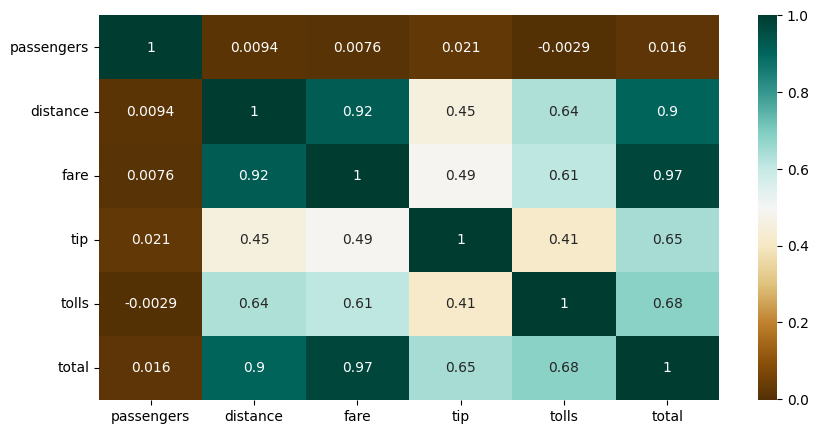

In [53]:
# Adjusting the Size of Figure
plt.figure(figsize=(10,5))
# calculating the Correlation
correlation = gt.corr()
# Displaying the correlation using the Heap Map
sns.heatmap(correlation,cmap="BrBG",annot=True) # Br: Brown. B: Blue, G: Green

# **Question 5: Perform Data Cleaning and Exploration using Pandas:**

# **Check the first few rows and data types.**

In [ ]:
data =pd.read_csv("/content/titanic_dataset.csv")

In [ ]:
first_few_rows = data.head()  # View the first few rows (default: 5)
data_types = data.dtypes  # Get data types of each column

print("First few rows:")
print(first_few_rows)

print("\nData types:")
print(data_types)

First few rows:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   N

# **Handle any missing values in the dataset, if present.**

In [ ]:
ds=data.isnull() #check missing value in dataframe
print(ds)



     PassengerId  Survived  Pclass   Name    Sex    Age  SibSp  Parch  Ticket  \
0          False     False   False  False  False  False  False  False   False   
1          False     False   False  False  False  False  False  False   False   
2          False     False   False  False  False  False  False  False   False   
3          False     False   False  False  False  False  False  False   False   
4          False     False   False  False  False  False  False  False   False   
..           ...       ...     ...    ...    ...    ...    ...    ...     ...   
886        False     False   False  False  False  False  False  False   False   
887        False     False   False  False  False  False  False  False   False   
888        False     False   False  False  False   True  False  False   False   
889        False     False   False  False  False  False  False  False   False   
890        False     False   False  False  False  False  False  False   False   

      Fare  Cabin  Embarked

In [ ]:
#check the columns of missing value
dt= data.isnull().sum()
print(dt)

#chech the total value in missing value
cd = data.isnull().sum().sum()
print('Toal missing value ', cd)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
Toal missing value  866


In [ ]:
fd=data.dropna() #remove the missing value
fd.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

# **Check for and handle any outliers in the data. (if there)**

<Axes: >

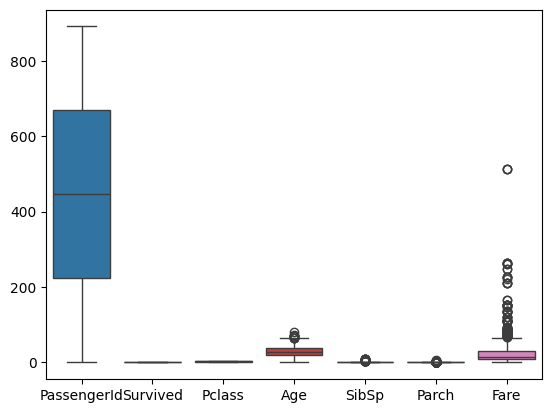

In [ ]:
sns.boxplot(data)

<Axes: ylabel='Age'>

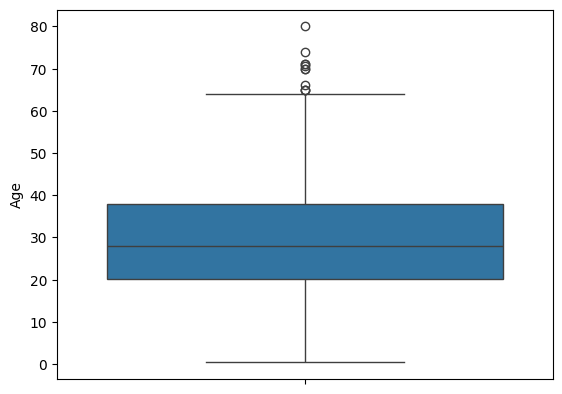

In [ ]:
sns.boxplot(data['Age'])

In [ ]:
data.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

# **Find Quartile**

In [ ]:
Q1 =data[['Age', 'SibSp', 'Parch', 'Fare']].quantile(0.25)
Q3 =data[['Age', 'SibSp', 'Parch', 'Fare']].quantile(0.75)

IQR =Q3 -Q1
print(IQR)


Age      17.8750
SibSp     1.0000
Parch     0.0000
Fare     23.0896
dtype: float64


# **Find Upper & Lower Bound**

In [ ]:
lower_limit = Q1-1.5*IQR
upper_limit = Q3 +1.5*IQR

print('lower limit: ', lower_limit)
print('upper limit : ', upper_limit)

lower limit:  Age      -6.6875
SibSp    -1.5000
Parch     0.0000
Fare    -26.7240
dtype: float64
upper limit :  Age      64.8125
SibSp     2.5000
Parch     0.0000
Fare     65.6344
dtype: float64


# **Finding Outliers**

In [ ]:
data[['Age', 'SibSp', 'Parch', 'Fare']] >upper_limit

Age  SibSp  Parch   Fare
0    False  False  False  False
1    False  False  False   True
2    False  False  False  False
3    False  False  False  False
4    False  False  False  False
..     ...    ...    ...    ...
886  False  False  False  False
887  False  False  False  False
888  False  False   True  False
889  False  False  False  False
890  False  False  False  False

[891 rows x 4 columns]

In [ ]:
data[['Age', 'SibSp', 'Parch', 'Fare']] < lower_limit

Age  SibSp  Parch   Fare
0    False  False  False  False
1    False  False  False  False
2    False  False  False  False
3    False  False  False  False
4    False  False  False  False
..     ...    ...    ...    ...
886  False  False  False  False
887  False  False  False  False
888  False  False  False  False
889  False  False  False  False
890  False  False  False  False

[891 rows x 4 columns]

# **Triming Method use remove outlier**

The trimmed mean is a statistical measure that calculates a dataset's average after removing a certain percentage of extreme values from both ends of the distribution. By excluding outliers, this statistic can provide a more accurate representation of a dataset's typical or central values.

In [ ]:
new_ds =  data[['Age', 'SibSp', 'Parch', 'Fare']] >upper_limit

In [ ]:
new_ds.shape

(891, 4)

<ipython-input-63-f56b80297f4a>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[['Age', 'SibSp', 'Parch', 'Fare']])
<ipython-input-63-f56b80297f4a>:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_ds[['Age', 'SibSp', 'Parch', 'Fare']] )


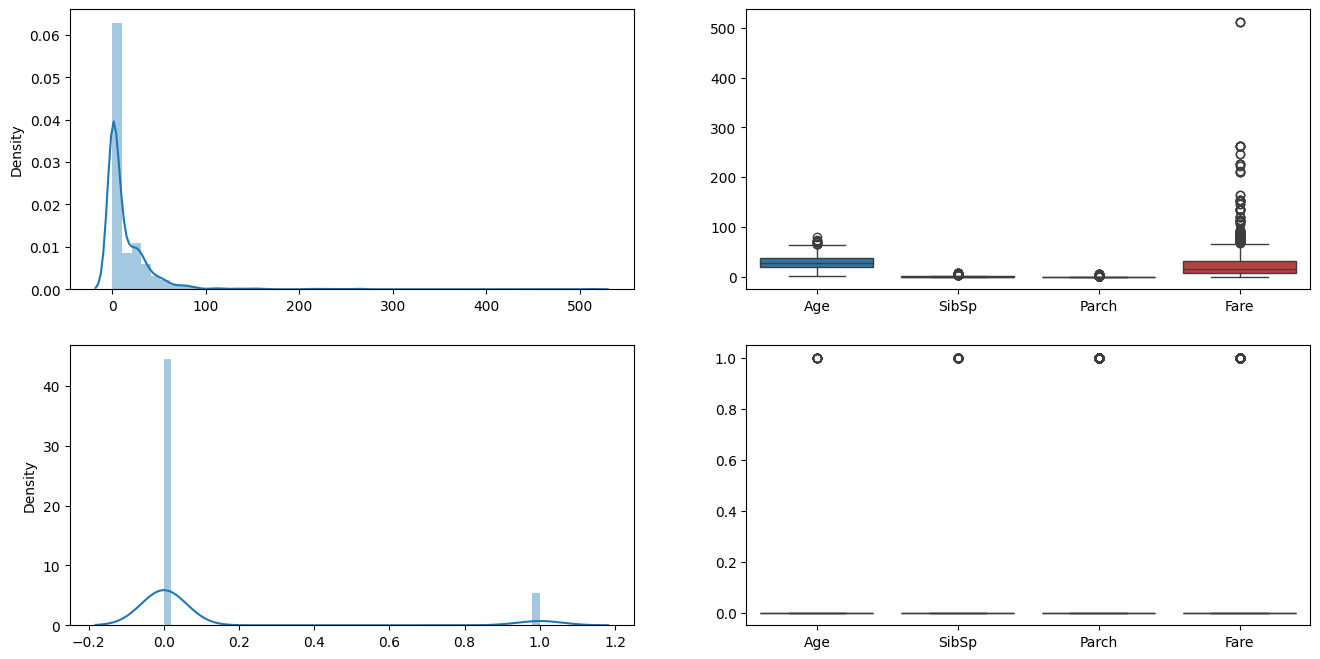

In [ ]:
# Comparing

plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(data[['Age', 'SibSp', 'Parch', 'Fare']])

plt.subplot(2,2,2)
sns.boxplot(data[['Age', 'SibSp', 'Parch', 'Fare']])

plt.subplot(2,2,3)
sns.distplot(new_ds[['Age', 'SibSp', 'Parch', 'Fare']] )

plt.subplot(2,2,4)
sns.boxplot(new_ds[['Age', 'SibSp', 'Parch', 'Fare']])

plt.show()

# **Capping Method Reomve Outliers**

Capping. In this technique called “outlier detection,” we cap our data to set limits. For instance, if we decide on a specific value, any data point above or below that value is considered an outlier. The number of outliers in the dataset then gives us insight into that capping number.

In [ ]:
new_df_cap = data.copy()

new_df_cap[['Age', 'SibSp', 'Parch', 'Fare']] = np.where(
    new_df_cap[['Age', 'SibSp', 'Parch', 'Fare']] > upper_limit,
    upper_limit,
    np.where(
        new_df_cap [['Age', 'SibSp', 'Parch', 'Fare']]< lower_limit,
        lower_limit,
        new_df_cap [['Age', 'SibSp', 'Parch', 'Fare']]
    )
)

In [ ]:

new_df_cap.shape

(891, 12)

<ipython-input-68-192590da1329>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[['Age', 'SibSp', 'Parch', 'Fare']])
<ipython-input-68-192590da1329>:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df_cap[['Age', 'SibSp', 'Parch', 'Fare']])


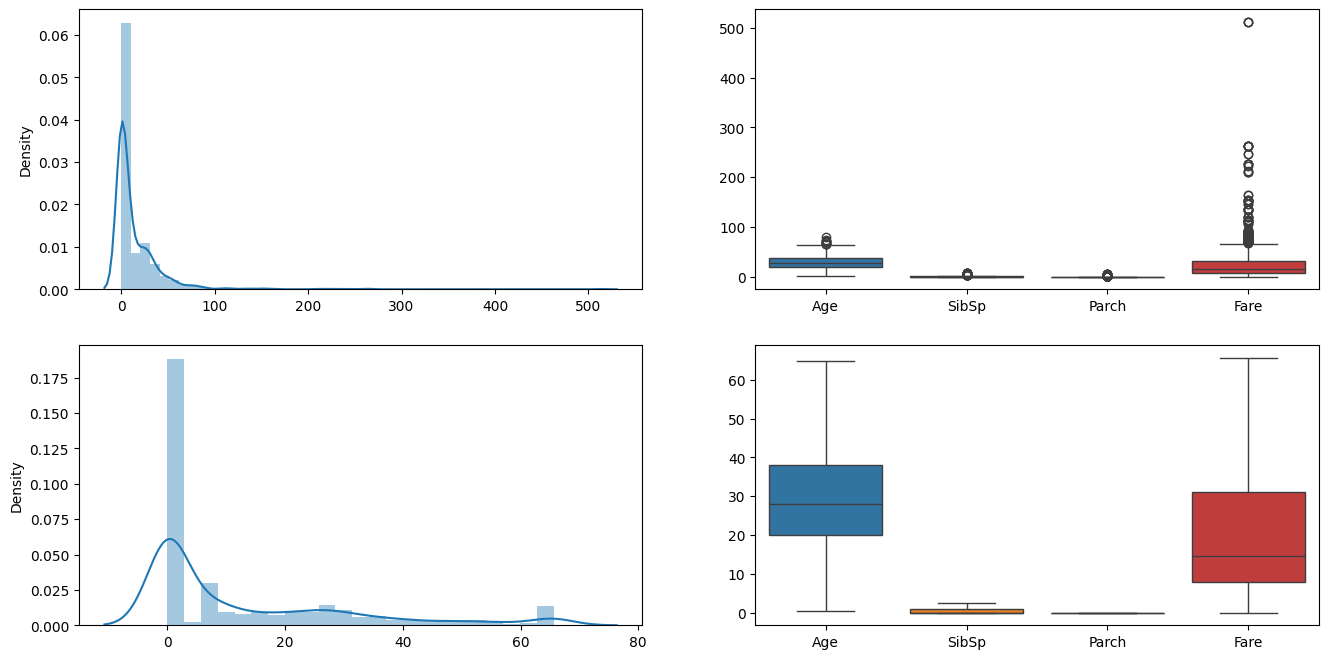

In [ ]:
# Comparing

plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(data[['Age', 'SibSp', 'Parch', 'Fare']])

plt.subplot(2,2,2)
sns.boxplot(data[['Age', 'SibSp', 'Parch', 'Fare']])

plt.subplot(2,2,3)
sns.distplot(new_df_cap[['Age', 'SibSp', 'Parch', 'Fare']])

plt.subplot(2,2,4)
sns.boxplot(new_df_cap [['Age', 'SibSp', 'Parch', 'Fare']])

plt.show()

# **Use matplotlib and seaborn to visualize the data distributions**

# **Displot**

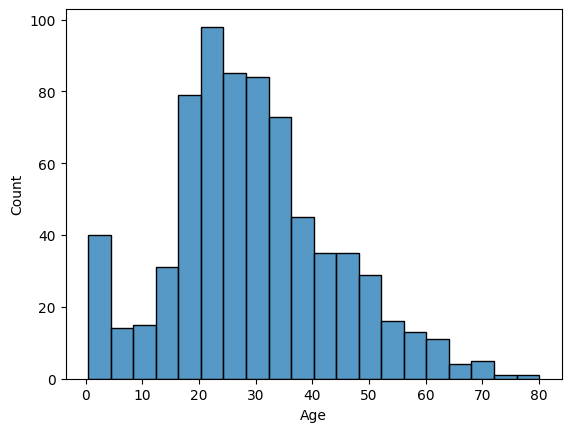

In [ ]:
sns.histplot(data['Age'],kde=False)
plt.show()


<ipython-input-23-6043b9146059>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Age'], hist=False)


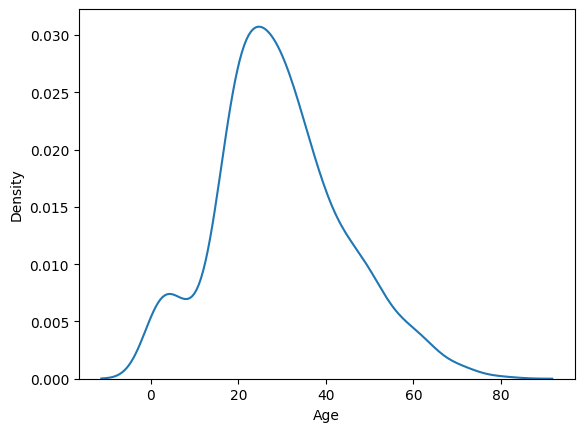

In [ ]:
sns.distplot(data['Age'], hist=False)
plt.show()

<ipython-input-33-0c4dfbc2c988>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Age'])


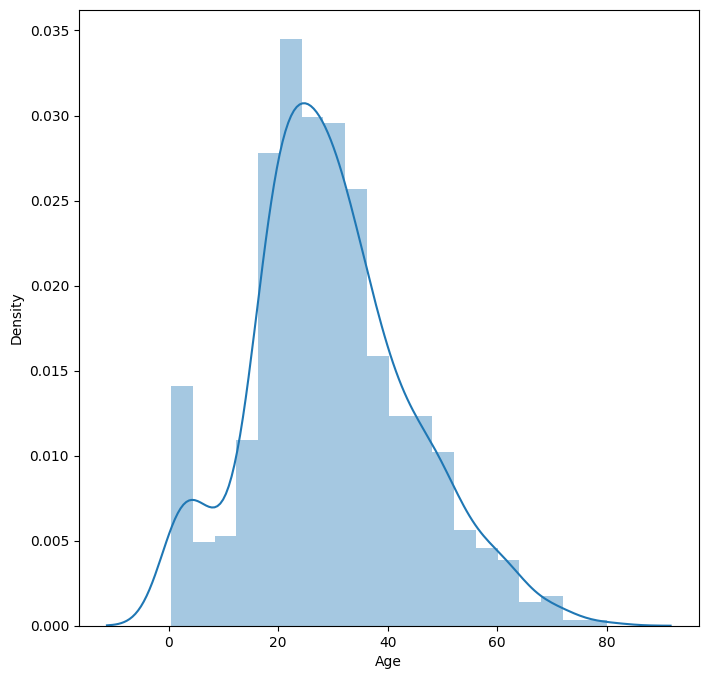

In [ ]:
plt.figure(figsize=(8,8))
sns.distplot(data['Age'])
plt.show()

# **. Relational plots**

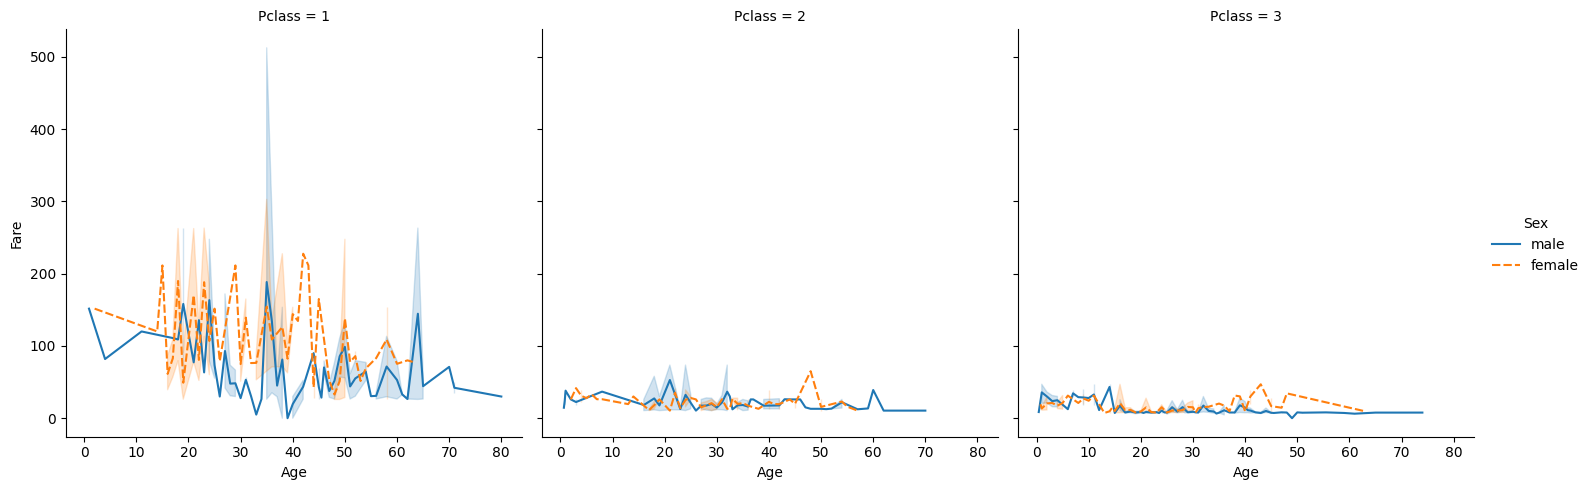

In [ ]:
sns.relplot(x="Age", y="Fare", col="Pclass", hue="Sex", style="Sex", kind="line", data=data)

# **. scatterplot**

<Axes: xlabel='Pclass', ylabel='Fare'>

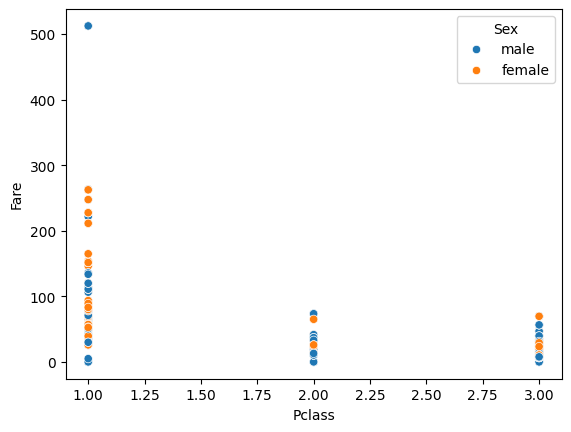

In [ ]:
sns.scatterplot(x="Pclass", y="Fare", hue="Sex", data=data)

# **lineplot**

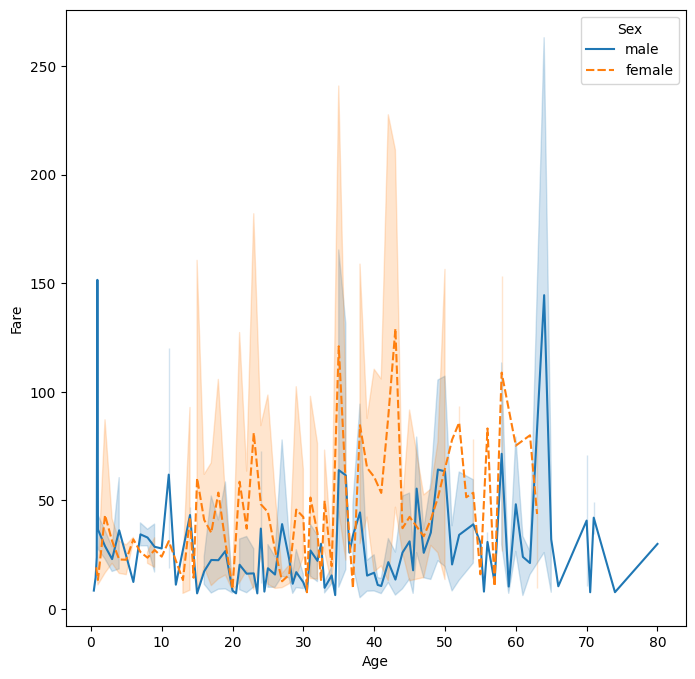

In [ ]:
plt.figure(figsize=(8,8))
sns.lineplot(x="Age", y="Fare", hue ="Sex", style="Sex", data=data)
plt.show()

# **Create a new column indicating whether a passenger is a** **child, adult, or elderly based on their**
# **age.**

In [ ]:
df_data = {'Name': ['Uzair', 'Ali', 'Saad', 'Irfan'],
        'Age': [10, 35, 70, 25]}
df = pd.DataFrame(df_data)


def categorize_age(age):
  """
  This function categorizes a passenger's age into child, adult, or elderly.

  Args:
      age (int): The passenger's age.

  Returns:
      str: Category label (child, adult, elderly) based on age ranges.
  """
  if age <= 17:
    return 'Child'
  elif age <= 64:
    return 'Adult'
  else:
    return 'Elderly'


df['Age_Group'] = df['Age'].apply(categorize_age)

print(df)

    Name  Age Age_Group
0  Uzair   10     Child
1    Ali   35     Adult
2   Saad   70   Elderly
3  Irfan   25     Adult


In [ ]:
data

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ...    ...   
886                              Montvila, Rev. Juozas    male  27.0      0   
887                       Graham, Miss. Margaret Edith  female  19.0      0   
888           Johnston, Miss. Catherine Helen "Carrie"  female   NaN      1   
889                              Behr, Mr. Karl Howell    male  26.0      0   
890                                Dooley, Mr. Patrick    male  32.0      0   

     Parch            Ticket     Fare Cabin Embarked  
0        0         A/5 21171   7.2500   NaN        S  
1        0          PC 17599  71.2833   C85        C  
2        0  STON/O2. 3101282   7.9250   NaN        S  
3        0            113803  53.1000  C123        S  
4        0            373450   8.0500   NaN        S  
..     ...               ...      ...   ...      ...  
886      0            211536  13.0000   NaN        S  
887      0            112053  30.0000   B42        S  
888      2        W./C. 6607  23.4500   NaN        S  
889      0            111369  30.0000  C148        C  
890      0            370376   7.7500   NaN        Q  

[891 rows x 12 columns]

# **Calculate the average fare paid by passengers in each class.**

In [ ]:

# Assuming you have a DataFrame 'data' with columns 'PassengerClass' and 'Fare'
class_averages = data.groupby('Pclass')['Fare'].mean()

print(class_averages)

Pclass
1    84.154687
2    20.662183
3    13.675550
Name: Fare, dtype: float64
